# performance_indicator
* log return
* Sharp ratio
* drawdown

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import FinanceDataReader as fdr

In [6]:
df1 = fdr.DataReader('005930','2018-01-02','2018-10-30')
df2 = fdr.DataReader('069500','2018-01-02','2018-10-30')

In [7]:
df = pd.concat([df1['Close'],df2['Close']],axis=1)
df.head()

,Close,Close
Date,,
2018-01-02,51020,29836
2018-01-03,51620,29964
2018-01-04,51080,29727
2018-01-05,52120,30131
2018-01-08,52020,30333


In [8]:
df.columns = ['삼성전자','kodex200']

In [16]:
# simple return
simple_rtn_df = df.pct_change(1).head().fillna(0)
simple_rtn_df

,삼성전자,kodex200
Date,,
2018-01-02,0.000000,0.000000
2018-01-03,0.011760,0.004290
2018-01-04,-0.010461,-0.007909
2018-01-05,0.020360,0.013590
2018-01-08,-0.001919,0.006704


In [94]:
# 누적수익률
cum_rtn_df = (simple_rtn_df+1).cumprod()
cum_rtn_df

,삼성전자,kodex200
Date,,
2018-01-02,1.000000,1.000000
2018-01-03,1.011760,1.004290
2018-01-04,1.001176,0.996347
2018-01-05,1.021560,1.009887
2018-01-08,1.019600,1.016658


## log return

In [13]:
# -> 곱셈 연산을 덧셈연산으로 바꿀수있고, 큰값을 작게 만들수 있다

log_rtn_df = np.log(df/df.shift(1))
log_rtn_df

,삼성전자,kodex200
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.011691,0.004281
2018-01-04,-0.010516,-0.007941
2018-01-05,0.020156,0.013499
2018-01-08,-0.001920,0.006682
...,...,...
2018-10-24,-0.011682,-0.005166
2018-10-25,-0.037108,-0.016105
2018-10-26,0.000000,-0.015998


<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 miss

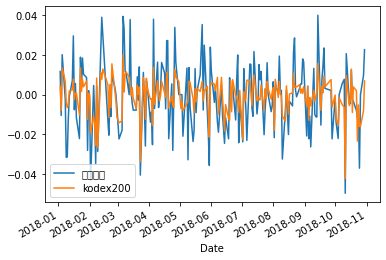

In [14]:
log_rtn_df.plot()
plt.show

<AxesSubplot:ylabel='Frequency'>

C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49457 miss

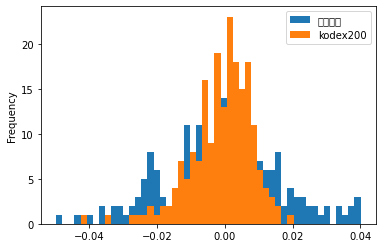

In [21]:
log_rtn_df.plot(kind='hist',bins= 50)

In [28]:
cum_rtn_df = (simple_rtn_df+1).cumprod()
cum_rtn_df

,삼성전자,kodex200
Date,,
2018-01-02,1.000000,1.000000
2018-01-03,1.011760,1.004290
2018-01-04,1.001176,0.996347
2018-01-05,1.021560,1.009887
2018-01-08,1.019600,1.016658


In [22]:
log_rtn_df.cumsum()
np.exp(log_rtn_df.cumsum())

,삼성전자,kodex200
Date,,
2018-01-02,NaN,NaN
2018-01-03,1.011760,1.004290
2018-01-04,1.001176,0.996347
2018-01-05,1.021560,1.009887
2018-01-08,1.019600,1.016658
...,...,...
2018-10-24,0.833987,0.841266
2018-10-25,0.803606,0.827825
2018-10-26,0.803606,0.814687


### log return 연환산 함수화

In [39]:
def get_annualized_returns_series(log_return_df, num_day_in_year=250):
    return(log_return_df.mean()*num_day_in_year).round(2)

def get_annualized_std_series(log_return_df, num_day_in_year=250):
    return (log_return_df.std() * (num_day_in_year ** 0.5)).round(2)
# var1 + var1 + .. => n* var1 의 분산구하기 위해 루트 씌워줌

In [40]:
get_annualized_returns_series(log_rtn_df, num_day_in_year =250) # 연평균 로그수익률

삼성전자       -0.23
kodex200   -0.26
dtype: float64

In [42]:
get_annualized_std_series(log_rtn_df, num_day_in_year=250) # 연평균 로그수익률의 표준편차

삼성전자        0.27
kodex200    0.14
dtype: float64

## CAGR(연환산 복리수익률)

In [52]:
# 누적수익률
cum_rtn_df

,삼성전자,kodex200
Date,,
2018-01-02,1.000000,1.000000
2018-01-03,1.011760,1.004290
2018-01-04,1.001176,0.996347
2018-01-05,1.021560,1.009887
2018-01-08,1.019600,1.016658


In [53]:
# 1년 기준으로 바꿔주는 수익률

num_day_in_year = 252

cum_rtn_df.iloc[-1]**(252/len(cum_rtn_df))

삼성전자        2.659908
kodex200    2.299367
Name: 2018-01-08 00:00:00, dtype: float64

In [54]:
# 연 평균 복리 수익률

def get_cagr_series(cum_rtn_df, num_day_in_year= 250):
    cagr_series = cum_rtn_df.iloc[-1]**(num_day_in_year/(len(cum_rtn_df)))
    return cagr_series

In [55]:
get_cagr_series(cum_rtn_df, num_day_in_year=250)

삼성전자        2.639336
kodex200    2.284222
Name: 2018-01-08 00:00:00, dtype: float64

## Sharp ratio(초과수익률/변동성)
* 단위위험당 얻을수있는 수익률(Ra-Rf/표준편차)

In [56]:
yearly_rfr = 0.025
excess_rtns = log_rtn_df.mean()-yearly_rfr
excess_rtns / (log_rtn_df.std() * np.sqrt(252))

삼성전자       -0.094232
kodex200   -0.179420
dtype: float64

In [57]:
#함수화
def get_sharpe_ratio(log_rtn_df, yearly_rfr = 0.025):
    excess_rtns = log_rtn_df.mean()*252 -yearly_rfr
    return excess_rtns / (log_rtn_df.std() * np.sqrt(252))

## Drawdown: 고점대비 하락률
* 낙폭이 크면 위험

In [60]:
temp_df = fdr.DataReader('069500','2019-01-02','2020-10-30')
log_rtn_df = np.log(temp_df.pct_change()+1).fillna(0)
log_rtn_df = log_rtn_df['Close']
cum_rtn_df = np.exp(log_rtn_df.cumsum())
get_cagr_series(cum_rtn_df, num_day_in_year = 250)

1.10478620660929

In [65]:
cummax_df = cum_rtn_df.cummax() # 누적수익률의 전고점
cummax_df

Date
2019-01-02    1.000000
2019-01-03    1.000000
2019-01-04    1.000000
2019-01-07    1.012027
2019-01-08    1.012027
                ...   
2020-10-26    1.280336
2020-10-27    1.280336
2020-10-28    1.280336
2020-10-29    1.280336
2020-10-30    1.280336
Name: Close, Length: 452, dtype: float64

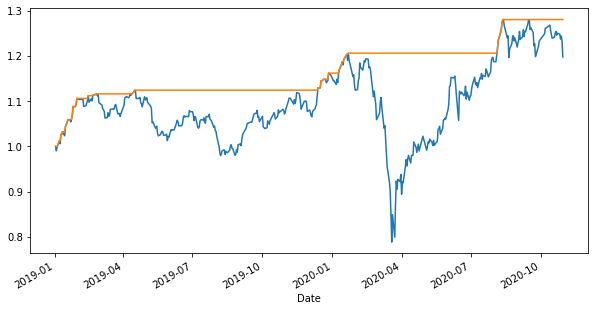

In [61]:
ax = cum_rtn_df.plot(figsize=(10,5))
cummax_df.plot(ax=ax)

plt.show()

In [62]:
drawdown_df = cum_rtn_df/cummax_df -1
drawdown_df

Date
2019-01-02    0.000000
2019-01-03   -0.009721
2019-01-04   -0.002142
2019-01-07    0.000000
2019-01-08   -0.006390
                ...   
2020-10-26   -0.025383
2020-10-27   -0.033747
2020-10-28   -0.028600
2020-10-29   -0.038702
2020-10-30   -0.064760
Name: Close, Length: 452, dtype: float64

### 1.MDD(max draw down)

In [63]:
# 가장 많이 떨어진 수치
mdd = drawdown_df.min() # 마이너스 값이므로
mdd

-0.34642576590730545

### 2. Longest dd period

In [67]:
# 가장 긴 기간
max_point_df = drawdown_df[drawdown_df==0]
max_point_df

Date
2019-01-02    0.0
2019-01-07    0.0
2019-01-09    0.0
2019-01-11    0.0
2019-01-15    0.0
2019-01-16    0.0
2019-01-17    0.0
2019-01-18    0.0
2019-01-21    0.0
2019-01-23    0.0
2019-01-24    0.0
2019-01-25    0.0
2019-01-29    0.0
2019-01-30    0.0
2019-02-14    0.0
2019-02-20    0.0
2019-02-21    0.0
2019-02-22    0.0
2019-02-25    0.0
2019-04-15    0.0
2019-04-16    0.0
2019-12-13    0.0
2019-12-17    0.0
2019-12-19    0.0
2019-12-20    0.0
2019-12-27    0.0
2020-01-10    0.0
2020-01-13    0.0
2020-01-14    0.0
2020-01-16    0.0
2020-01-17    0.0
2020-01-20    0.0
2020-01-22    0.0
2020-08-05    0.0
2020-08-06    0.0
2020-08-07    0.0
2020-08-10    0.0
2020-08-11    0.0
2020-08-12    0.0
2020-09-15    0.0
Name: Close, dtype: float64

In [74]:
first_df = max_point_df.index[:-1]
first_df

DatetimeIndex(['2019-01-02', '2019-01-07', '2019-01-09', '2019-01-11',
               '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18',
               '2019-01-21', '2019-01-23', '2019-01-24', '2019-01-25',
               '2019-01-29', '2019-01-30', '2019-02-14', '2019-02-20',
               '2019-02-21', '2019-02-22', '2019-02-25', '2019-04-15',
               '2019-04-16', '2019-12-13', '2019-12-17', '2019-12-19',
               '2019-12-20', '2019-12-27', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-16', '2020-01-17', '2020-01-20',
               '2020-01-22', '2020-08-05', '2020-08-06', '2020-08-07',
               '2020-08-10', '2020-08-11', '2020-08-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [75]:
second_df = max_point_df.index[1:]
second_df

DatetimeIndex(['2019-01-07', '2019-01-09', '2019-01-11', '2019-01-15',
               '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-21',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-29',
               '2019-01-30', '2019-02-14', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-25', '2019-04-15', '2019-04-16',
               '2019-12-13', '2019-12-17', '2019-12-19', '2019-12-20',
               '2019-12-27', '2020-01-10', '2020-01-13', '2020-01-14',
               '2020-01-16', '2020-01-17', '2020-01-20', '2020-01-22',
               '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-10',
               '2020-08-11', '2020-08-12', '2020-09-15'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [76]:
period = second_df-first_df
period

TimedeltaIndex([  '5 days',   '2 days',   '2 days',   '4 days',   '1 days',
                  '1 days',   '1 days',   '3 days',   '2 days',   '1 days',
                  '1 days',   '4 days',   '1 days',  '15 days',   '6 days',
                  '1 days',   '1 days',   '3 days',  '49 days',   '1 days',
                '241 days',   '4 days',   '2 days',   '1 days',   '7 days',
                 '14 days',   '3 days',   '1 days',   '2 days',   '1 days',
                  '3 days',   '2 days', '196 days',   '1 days',   '1 days',
                  '3 days',   '1 days',   '1 days',  '34 days'],
               dtype='timedelta64[ns]', name='Date', freq=None)

In [78]:
# 가장 큰 인덱스값 출력
period.argmax()

20

In [90]:
period.max().days

241

In [87]:
ldd_st = first_df[period.argmax()]

In [88]:
ldd_ed = second_df[period.argmax()]

In [89]:
print(ldd_st, ldd_ed)

2019-04-16 00:00:00 2019-12-13 00:00:00


### 함수화

In [102]:
temp_df = fdr.DataReader('069500','2019-01-02','2020-10-30')
log_rtn_df = np.log(temp_df.pct_change()+1).fillna(0)
log_rtn_df = log_rtn_df['Close']
cum_rtn_df = np.exp(log_rtn_df.cumsum())
get_cagr_series(cum_rtn_df, num_day_in_year = 250)

1.10478620660929

In [103]:
def get_drawdown_infos(cum_returns_df):
    cummax_df = cum_rtn_df.cummax()
    dd_df = cum_returns_df / cummax_df -1
    
    mdd_series = dd_df.min()
    
    max_point_df = dd_df[dd_df==0]
    
    first_df = max_point_df.index[:-1]
    second_df = max_point_df.index[1:]
    
    period = second_df-first_df
    
    longest_dd_period = period.max().days
    
    ldd_st = first_df[period.argmax()]
    ldd_ed = second_df[period.argmax()]
    
    return mdd_series, longest_dd_period, ldd_st, ldd_ed

In [104]:
mmd, longest_dd, longest_dd_st, longest_dd_ed = get_drawdown_infos(cum_rtn_df)

In [105]:
print('최대하락폭: ',mdd)
print('최대하락기간: ', longest_dd)
print('하락시작기간: ', longest_dd_st)
print('하락끝기간: ', longest_dd_ed)

최대하락폭:  -0.34642576590730545
최대하락기간:  241
하락시작기간:  2019-04-16 00:00:00
하락끝기간:  2019-12-13 00:00:00
